# (Pattern & Co)

## Detection de caractéristiques sur des images binaires

Images binaires => on peut utiliser la MM

Les objets binaires peuvent être caractérisés par des descripteurs de forme, par exemple :

- le centroïde : coordonnées du barycentre

- la surface : nombre de pixels de l'objet

- la boîte englobante \eng{bounding box} : le plus petit rectangle contenant l'objet

- le périmètre : la longueur de la ligne reliant les pixels du contour
  on peut caluler le périmètre en comptant le nombre de pixels du contour, 
  que l'on peut obtenir en enlevant l'image érodée de l'image originale~:
  
  $$
    \partial I = I \setminus (I \ominus E)
  $$
  
  Une alternative est d'enlever l'image originale à sa dilatée~:
  
  $$
    \partial I = (I \oplus E) \setminus I
  $$
  
  (exemple avec le mannele)

- compacité~:
  
  $$
    C = \frac{4 \pi \times \text{surface}}{\text{périmètre}^2}
  $$
  
  $C = 1$ pour un disque, $C = 4\pi/16 \approx 0,20$ pour un carré.

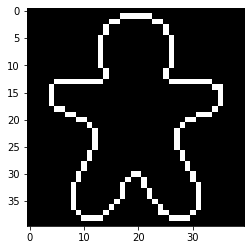

In [2]:
import numpy as np
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.transform import resize
from matplotlib.pyplot import imshow, show
from skimage.morphology import binary_erosion, binary_dilation

img = imread('figs/bonhomme.png')
img2 = rgb2gray(img)
N = 40
img3 = resize(img2, (N,N))
img4 = img3<0.8
imshow(img4, cmap='gray')
# imsave('contour-img.png', img4*255)

se = np.array([ \
    [0, 1, 0], \
    [1, 1, 1], \
    [0, 1, 0] ])
imshow(se, cmap='gray')

img5 = binary_erosion(img4,se)
imshow(img5, cmap='gray')
# imsave('contour-erosion.png', img5*255)

img6 = img4*1 - img5*1
imshow(img6, cmap='gray')
# imsave('contour-result.png', img6*255)